# Sales Data Analysis and Visualizations

## The management team has outlined seven critical questions they would like to address through analysis of this dataset.
### Here are the Research Questions:
1. You need to calculate the monthly sales  the store and identify which month had the highest sales and which month had the lowest sales.
2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.
3. The sales analysis needs to be done based on sub-categories.
4. You need to analyze the monthly profit from sales and determine which month had the highest profit.
5. Analyze the profit by category and sub-category.
6. Analyze the sales and profit by customer segment.
7. Analyze the sales to profit ratio.

---------------------------------
1.Pandas for Data Cleaning
2. Plotly.Express For For Data Visualizations (Advance, Fast and Provide more functionalities)
3. Plotly.grapah_objects For Advance and customize Graphs
4. Plotly.io For Graphs Templates
5. Plotly.colors For Colors to use in Graphs
6. Pio.templates For By Default theme color

In [178]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = 'plotly_white'

In [180]:
df = pd.read_csv("Superstore_dataset.csv", encoding = 'latin-1') #Encoding means that as we have underscoore and slash like / in the dataset so our machine can understand this as well properly

In [601]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Day of the Week'],
      dtype='object')

In [182]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [184]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Converting Date columns

In [189]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [191]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [195]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### We want to Analayze the data in monthly and Yearly wise so let's extract the month and year from the order date column

In [544]:
df['Order Year'] =  df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Day of the Week'] = df['Order Date'].dt.dayofweek

In [546]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Day of the Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,6


In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           9994 non-null   int64         
 1   Order ID         9994 non-null   object        
 2   Order Date       9994 non-null   datetime64[ns]
 3   Ship Date        9994 non-null   datetime64[ns]
 4   Ship Mode        9994 non-null   object        
 5   Customer ID      9994 non-null   object        
 6   Customer Name    9994 non-null   object        
 7   Segment          9994 non-null   object        
 8   Country          9994 non-null   object        
 9   City             9994 non-null   object        
 10  State            9994 non-null   object        
 11  Postal Code      9994 non-null   int64         
 12  Region           9994 non-null   object        
 13  Product ID       9994 non-null   object        
 14  Category         9994 non-null   object 

### 1. You need to calculate the monthly sales  of the store and identify which month had the highest sales and which month had the lowest sales.

In [591]:
monthly_sales = df.groupby(['Order Year', 'Order Month'], observed=False)['Sales'].sum().reset_index()
monthly_sales

,Order Year,Order Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


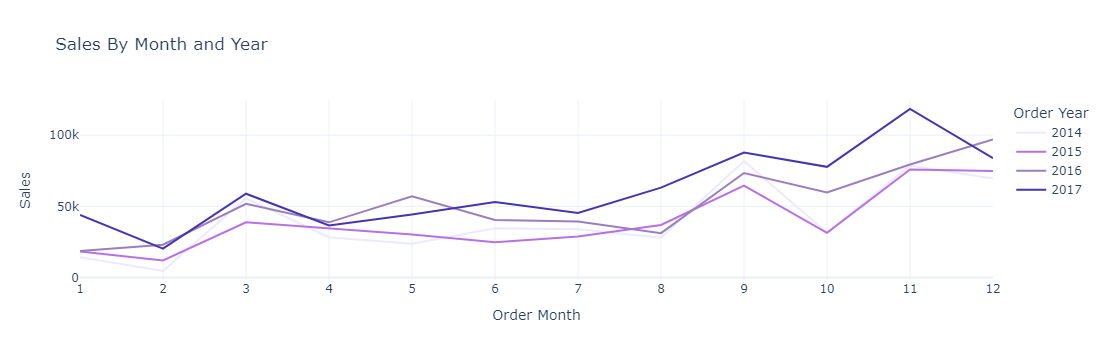

In [597]:
purple_shades = ['#EBEAFF', '#B771E5','#9B7EBD', '#4635B1']
fig = px.line(monthly_sales, x = 'Order Month', y = 'Sales',
title = 'Sales By Month and Year', color='Order Year',
color_discrete_sequence=purple_shades)
fig.update_xaxes(type='category')
fig.show()

### Insight:
1. Highest Sales Month: December consistently shows the highest sales across the years, peaking especially in 2017.
2. Lowest Sales Month: January has the lowest sales in most years.

### Recommendation:
1. Leverage December as the primary sales month by offering holiday promotions and discounts to maximize revenue.
2. Introduce targeted marketing campaigns or discounts during January to boost sales in the slowest month.

In [587]:
df['Order Year'] = df['Order Year'].astype('category')
Yearly_sales = df.groupby(['Order Year'],observed=False)['Sales'].sum().reset_index().round(2)
Yearly_sales

,Order Year,Sales
0,2014,484247.50
1,2015,470532.51
2,2016,609205.60
3,2017,733215.26


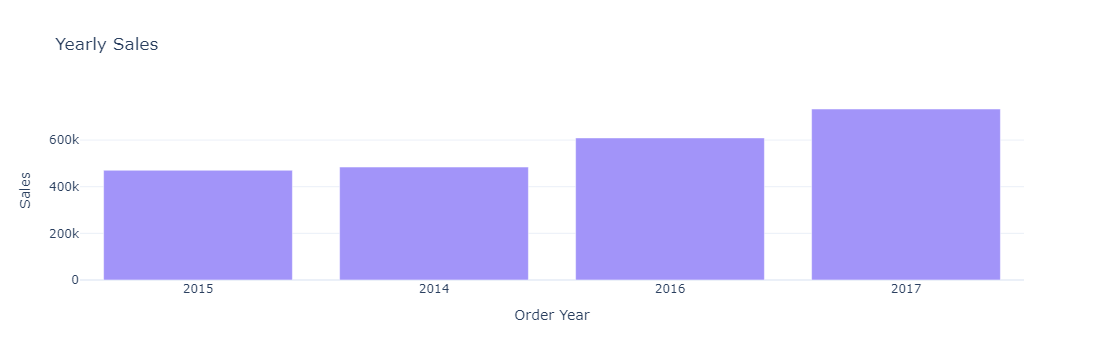

In [563]:
purple_shades = ['#A294F9']
fig = px.bar(Yearly_sales,
            x= 'Order Year',
            y='Sales',
            title = 'Yearly Sales',
            color_discrete_sequence = purple_shades
)
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.update_xaxes(type='category')
fig.show()

### 2. You need to analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.

In [212]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


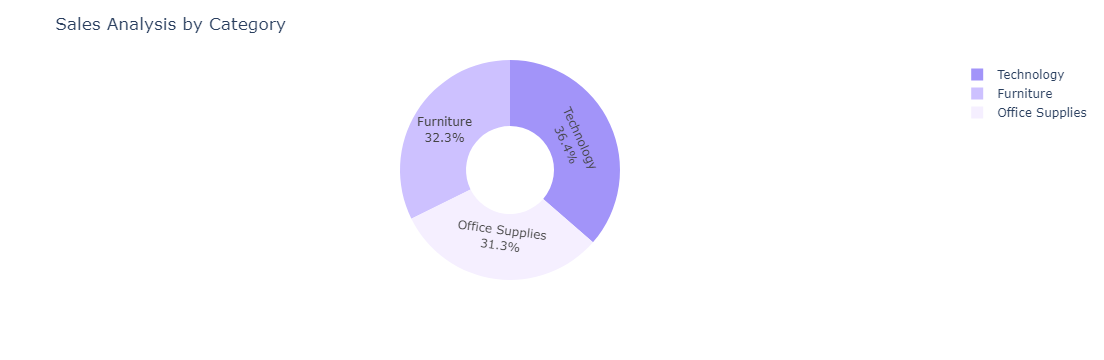

In [413]:
purple_shades = ['#A294F9', '#CDC1FF', '#F5EFFF']

fig = px.pie(
    sales_by_category,
    names='Category',
    values='Sales',
    hole=0.4,
    color_discrete_sequence=purple_shades
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category')
fig.show()

### Insight:
1. Highest Sales Category: Technology contributes the highest sales at 36.4%.
2. Lowest Sales Category: Office Supplies has the lowest sales at 31.3%.

### Recommendation:
1. Focus on maintaining inventory and providing attractive promotions for Phones and Chairs to sustain their strong performance.
2. Investigate the low sales in Fasteners and Labels to determine if they are essential to the product mix; if not, consider reducing inventory or discontinuing these items.

### 3. The sales analysis needs to be done based on sub-categories.

In [217]:
Counting = len(pd.unique(df['Sub-Category']))
Counting

17

In [348]:
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_subcategory.sort_values(by='Sales')

,Sub-Category,Sales
8,Fasteners,3024.2800
10,Labels,12486.3120
7,Envelopes,16476.4020
2,Art,27118.7920
15,Supplies,46673.5380
12,Paper,78479.2060
9,Furnishings,91705.1640
1,Appliances,107532.1610
4,Bookcases,114879.9963
6,Copiers,149528.0300


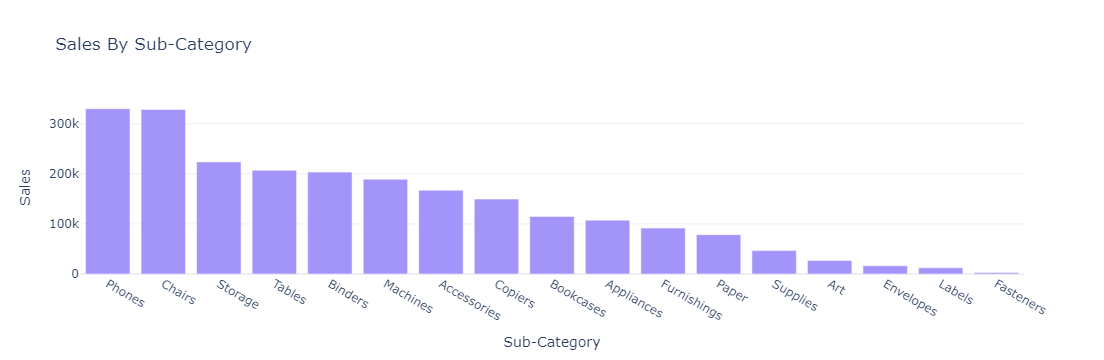

In [368]:
purple_shades = ['#A294F9']
fig = px.bar(sales_by_subcategory,
            x= 'Sub-Category',
            y='Sales',
            title = 'Sales By Sub-Category',
            color_discrete_sequence=purple_shades
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

### Insight:
1. Top Sub-Categories by Sales: Phones and Chairs are the highest-performing sub-categories, each generating over 300k in sales.
2. Lowest Sub-Categories by Sales: Fasteners and Labels contribute the least to sales.

### Recommendation:
1. Focus on maintaining inventory and providing attractive promotions for Phones and Chairs to sustain their strong performance.
2. Investigate the low sales in Fasteners and Labels to determine if they are essential to the product mix; if not, consider reducing inventory or discontinuing these items.

### 4. You need to analyze the monthly profit from sales and determine which month had the highest profit.

In [585]:
monthly_profit = df.groupby(['Order Year', 'Order Month'], observed=False)['Profit'].sum().reset_index()
monthly_profit

,Order Year,Order Month,Profit
0,2014,1,2450.1907
1,2014,2,862.3084
2,2014,3,498.7299
3,2014,4,3488.8352
4,2014,5,2738.7096
5,2014,6,4976.5244
6,2014,7,-841.4826
7,2014,8,5318.1050
8,2014,9,8328.0994
9,2014,10,3448.2573


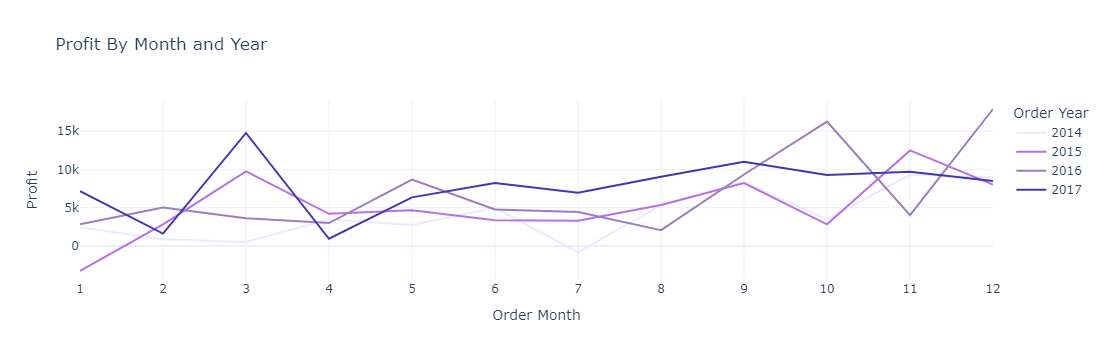

In [595]:
purple_shades = ['#EBEAFF', '#B771E5','#9B7EBD', '#4635B1']
fig = px.line(monthly_profit, x = 'Order Month', y = 'Profit',
title = 'Profit By Month and Year', color='Order Year',
color_discrete_sequence=purple_shades)
fig.update_xaxes(type='category')
fig.show()

### 5. Analyze the profit by category and sub-category.

In [261]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


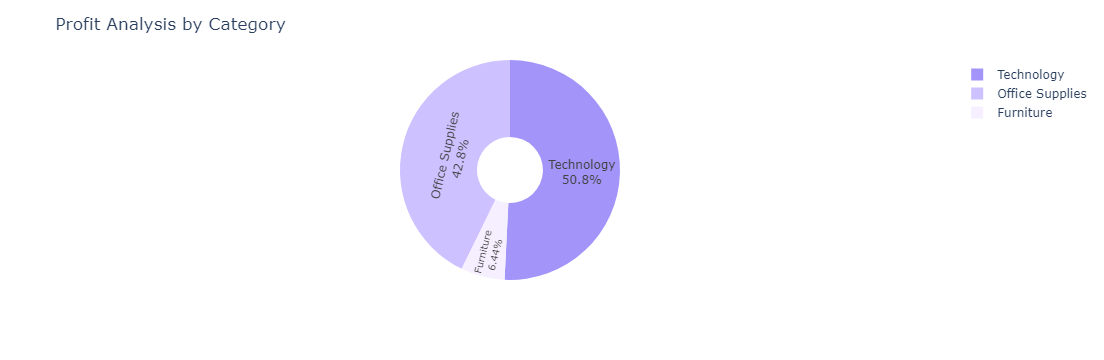

In [370]:
purple_shades = ['#A294F9', '#CDC1FF', '#F5EFFF']
fig = px.pie(profit_by_category,
            names = 'Category',
            values = 'Profit',
            hole = 0.3,
            color_discrete_sequence = purple_shades
            )
fig.update_traces(textposition = 'inside', textinfo = 'percent+label')
fig.update_layout(title_text = 'Profit Analysis by Category')
fig.show()

In [275]:
profit_by_sub_category = df.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_sub_category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


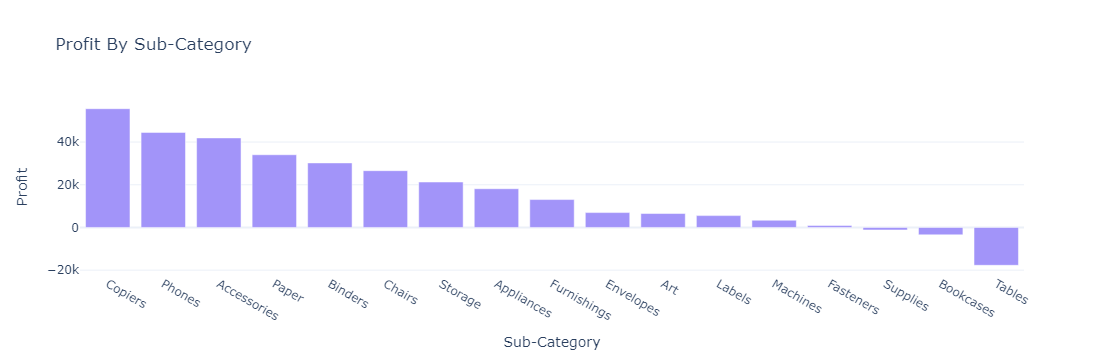

In [380]:
purple_shades = ['#A294F9']
fig = px.bar(profit_by_sub_category,
            x= 'Sub-Category',
            y='Profit',
            title = 'Profit By Sub-Category',
            color_discrete_sequence = purple_shades
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

### Insight:
1. Copiers, Phones, and Accessories generate the highest profits, indicating strong market demand and effective pricing strategies.
2. Tables and Bookcases result in significant losses, suggesting inefficiencies or poor demand in these sub-categories.
### Recommendations:
1. Focus on High-Performing Sub-Categories: Increase marketing efforts and inventory for Copiers, Phones, and Accessories to further capitalize on their profitability.
2. Reassess Loss-Making Sub-Categories: Evaluate pricing, demand, and supply chain for Tables and Bookcases. Consider discontinuing or re-strategizing these products.
3. Optimize Marginal Sub-Categories: Improve efficiency and promotion for sub-categories with marginal profits, such as Art and Labels, to boost overall profitability.

### 6. Analyze the sales and profit by customer segment.

In [324]:
sales_profit_bySegment = df.groupby('Segment').agg({'Sales' : 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_bySegment

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


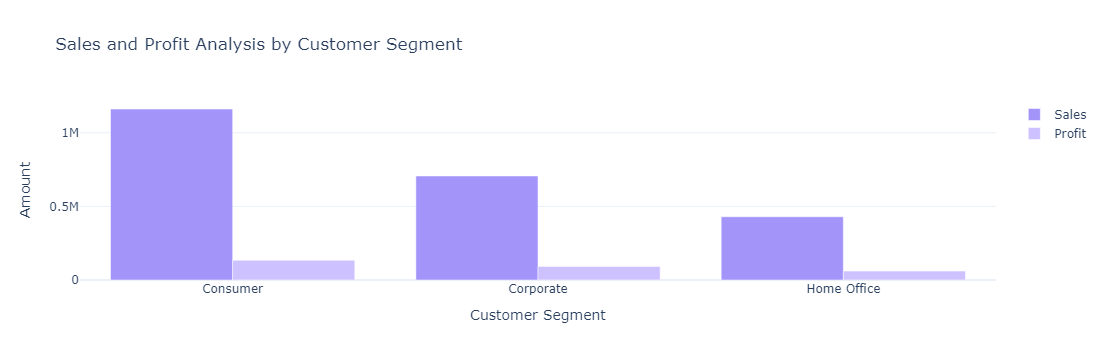

In [384]:
color_palette = ['#A294F9', '#CDC1FF']
fig = go.Figure()
fig.add_trace(go.Bar(
    x=sales_profit_bySegment['Segment'],
    y=sales_profit_bySegment['Sales'],
    name='Sales',
    marker_color=color_palette[0]))

fig.add_trace(go.Bar(
    x=sales_profit_bySegment['Segment'],
    y=sales_profit_bySegment['Profit'],
    name='Profit',
    marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')
fig.show()

### Insight:
1. The Consumer segment generates the highest sales and profit, followed by Corporate, while Home Office has the lowest profit despite decent sales.
### Recommendations:
1. Focus on Home Office: Investigate the low profitability in the Home Office segment and review pricing or discount strategies.
2. Leverage Consumer Segment: Invest in targeted marketing campaigns to further capitalize on the high-performing Consumer segment.
3. Optimize Corporate Strategies: Explore ways to increase profitability in the Corporate segment, such as enhancing customer loyalty programs or reducing operational costs.

### 7. Analyze the sales to profit ratio.

In [400]:
sales_profit_by_segment = df.groupby('Segment').agg({'Sales' : 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales']/sales_profit_by_segment['Profit']
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales_to_Profit_Ratio'].round(2)
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer                   8.66
1    Corporate                   7.68
2  Home Office                   7.13


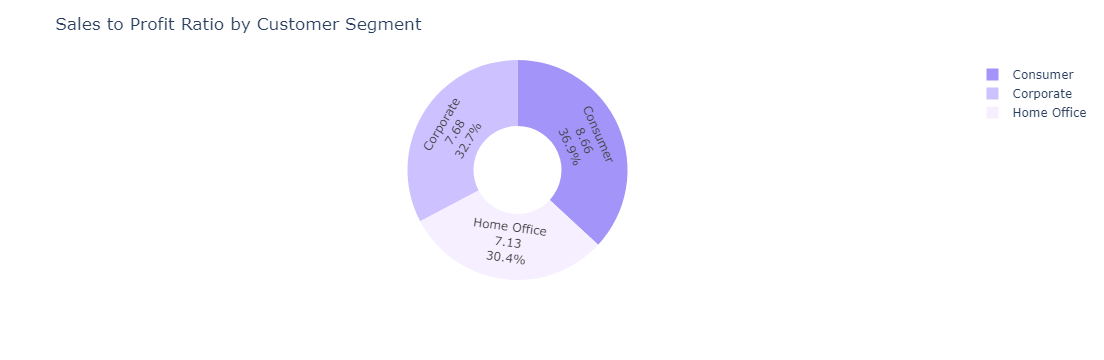

In [415]:
color_palette = ['#A294F9', '#CDC1FF', '#F5EFFF']
fig = px.pie(
    sales_profit_by_segment,
    names='Segment',
    values='Sales_to_Profit_Ratio',
    hole=0.4,
    color_discrete_sequence=color_palette
)

fig.update_traces(textposition='inside', textinfo='label+percent+value')
fig.update_layout(title='Sales to Profit Ratio by Customer Segment')
fig.show()

### Insight:
1. The Consumer segment has the highest sales-to-profit ratio (36.9%), indicating strong profitability.
2. The Corporate segment follows closely (32.7%), while Home Office has the lowest ratio (30.4%), suggesting inefficiencies or higher costs.
### Recommendations:
1. Improve Home Office Efficiency: Identify cost drivers in the Home Office segment and optimize operational processes or pricing strategies.
2. Maintain Consumer Profitability: Continue investing in the Consumer segment to sustain its high sales-to-profit ratio.
3. Increase Corporate Focus: Enhance profitability in the Corporate segment through strategic upselling or optimizing shipping costs.